In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('Anime.csv')
corr_df=df

#corr_df.head()

In [3]:
df.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [4]:
df.tail()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
18490,18491,Qin Shi Mingyue: Canghai Hengliu Xiaomeng Spec...,NaN,Web,2.0,Sparkly Key Animation Studio,NaN,"Action, Ancient China, Chinese Animation, Hist...",NaN,2020.0,NaN,Special episodes of Qin Shi Mingyue: Canghai H...,NaN,NaN,Qin Shi Mingyue: Canghai Hengliu,NaN,NaN
18491,18492,Yi Tang Juchang: Sanguo Yanyi,NaN,TV,108.0,NaN,NaN,Chinese Animation,NaN,2010.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN,NaN,NaN
18492,18493,Fenghuang Ji Xiang Yu Qingming Shanghe Tu,NaN,TV,13.0,NaN,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN,NaN,NaN
18493,18494,Chengshi Jiyi Wo Men de Jieri,NaN,TV,NaN,NaN,NaN,"Chinese Animation, Family Friendly, Short Epis...",NaN,2020.0,NaN,No synopsis yet - check back soon!,NaN,NaN,NaN,NaN,NaN
18494,18495,Heisei Inu Monogatari Bow: Genshi Inu Monogata...,NaN,Movie,NaN,Nippon Animation,NaN,"Comedy, Slice of Life, Dogs",NaN,1994.0,NaN,No synopsis yet - check back soon!,NaN,NaN,Heisei Inu Monogatari Bow,NaN,NaN


In [5]:
df.shape

(18495, 17)

In [6]:
df.columns
for column in df.columns:
    print(column)
#no renaming of the columns is required it us convineient

Rank
Name
Japanese_name
Type
Episodes
Studio
Release_season
Tags
Rating
Release_year
End_year
Description
Content_Warning
Related_Mange
Related_anime
Voice_actors
staff


In [7]:
df.dtypes

Rank                 int64
Name                object
Japanese_name       object
Type                object
Episodes           float64
Studio              object
Release_season      object
Tags                object
Rating             float64
Release_year       float64
End_year           float64
Description         object
Content_Warning     object
Related_Mange       object
Related_anime       object
Voice_actors        object
staff               object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             18495 non-null  int64  
 1   Name             18495 non-null  object 
 2   Japanese_name    7938 non-null   object 
 3   Type             18495 non-null  object 
 4   Episodes         9501 non-null   float64
 5   Studio           12018 non-null  object 
 6   Release_season   4116 non-null   object 
 7   Tags             18095 non-null  object 
 8   Rating           15364 non-null  float64
 9   Release_year     18112 non-null  float64
 10  End_year         2854 non-null   float64
 11  Description      18491 non-null  object 
 12  Content_Warning  1840 non-null   object 
 13  Related_Mange    7627 non-null   object 
 14  Related_anime    10063 non-null  object 
 15  Voice_actors     15309 non-null  object 
 16  staff            13005 non-null  object 
dtypes: float64(4

In [9]:
# havinh too much null values

In [10]:
df.isnull()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,False,False,True,False,False,False,True,False,True,False,True,False,True,True,False,True,True
18491,False,False,True,False,False,True,True,False,True,False,True,False,True,True,True,True,True
18492,False,False,True,False,False,True,True,False,True,False,True,False,True,True,True,True,True
18493,False,False,True,False,True,True,True,False,True,False,True,False,True,True,True,True,True


In [11]:
len(df.columns)

17

In [12]:
df.isnull().sum()
# checkinh how many missing values are there

Rank                   0
Name                   0
Japanese_name      10557
Type                   0
Episodes            8994
Studio              6477
Release_season     14379
Tags                 400
Rating              3131
Release_year         383
End_year           15641
Description            4
Content_Warning    16655
Related_Mange      10868
Related_anime       8432
Voice_actors        3186
staff               5490
dtype: int64

In [13]:
df.isnull().sum().sort_values()

Rank                   0
Name                   0
Type                   0
Description            4
Release_year         383
Tags                 400
Rating              3131
Voice_actors        3186
staff               5490
Studio              6477
Related_anime       8432
Episodes            8994
Japanese_name      10557
Related_Mange      10868
Release_season     14379
End_year           15641
Content_Warning    16655
dtype: int64

In [14]:
df.dtypes  
# for checkinng any date type columns

Rank                 int64
Name                object
Japanese_name       object
Type                object
Episodes           float64
Studio              object
Release_season      object
Tags                object
Rating             float64
Release_year       float64
End_year           float64
Description         object
Content_Warning     object
Related_Mange       object
Related_anime       object
Voice_actors        object
staff               object
dtype: object

In [15]:
df.head() #once again checking the initial data

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [16]:
df.describe

<bound method NDFrame.describe of         Rank                                               Name  \
0          1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1          2                     Fruits Basket the Final Season   
2          3                                    Mo Dao Zu Shi 3   
3          4                   Fullmetal Alchemist: Brotherhood   
4          5                Attack on Titan 3rd Season: Part II   
...      ...                                                ...   
18490  18491  Qin Shi Mingyue: Canghai Hengliu Xiaomeng Spec...   
18491  18492                      Yi Tang Juchang: Sanguo Yanyi   
18492  18493          Fenghuang Ji Xiang Yu Qingming Shanghe Tu   
18493  18494                      Chengshi Jiyi Wo Men de Jieri   
18494  18495  Heisei Inu Monogatari Bow: Genshi Inu Monogata...   

                                         Japanese_name   Type  Episodes  \
0                        Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1          

In [17]:
#missing values stratigies 
# dropping the missing values rows totallu

In [18]:
df.isnull().sum().sort_values(ascending = False)

Content_Warning    16655
End_year           15641
Release_season     14379
Related_Mange      10868
Japanese_name      10557
Episodes            8994
Related_anime       8432
Studio              6477
staff               5490
Voice_actors        3186
Rating              3131
Tags                 400
Release_year         383
Description            4
Name                   0
Type                   0
Rank                   0
dtype: int64

In [19]:
df_new = df.dropna()

In [20]:
df_new.isnull().sum()

Rank               0
Name               0
Japanese_name      0
Type               0
Episodes           0
Studio             0
Release_season     0
Tags               0
Rating             0
Release_year       0
End_year           0
Description        0
Content_Warning    0
Related_Mange      0
Related_anime      0
Voice_actors       0
staff              0
dtype: int64

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 3 to 15195
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             40 non-null     int64  
 1   Name             40 non-null     object 
 2   Japanese_name    40 non-null     object 
 3   Type             40 non-null     object 
 4   Episodes         40 non-null     float64
 5   Studio           40 non-null     object 
 6   Release_season   40 non-null     object 
 7   Tags             40 non-null     object 
 8   Rating           40 non-null     float64
 9   Release_year     40 non-null     float64
 10  End_year         40 non-null     float64
 11  Description      40 non-null     object 
 12  Content_Warning  40 non-null     object 
 13  Related_Mange    40 non-null     object 
 14  Related_anime    40 non-null     object 
 15  Voice_actors     40 non-null     object 
 16  staff            40 non-null     object 
dtypes: float64(4), 

In [22]:
df_new.shape  # having too much small rows. so for the prediction the testing and training we get bad scores

(40, 17)

In [23]:
df.describe()

,Rank,Episodes,Rating,Release_year,End_year
count,18495.00000,9501.000000,15364.000000,18112.000000,2854.000000
mean,9248.00000,20.920850,3.355133,2006.520318,2004.256132
std,5339.19095,37.990858,0.400624,15.189537,13.257484
min,1.00000,1.000000,0.960000,1907.000000,1962.000000
25%,4624.50000,2.000000,3.130000,2001.000000,1996.000000
50%,9248.00000,12.000000,3.360000,2012.000000,2007.000000
75%,13871.50000,26.000000,3.590000,2017.000000,2015.000000
max,18495.00000,800.000000,4.600000,2023.000000,2022.000000


In [24]:
df[df['Release_year'] == 2020.0].sum()

Rank                                                      7812642
Name            Jujutsu KaisenAttack on Titan The Final Season...
Type            TV   TV   MovieMovieTV   TV   TV   Web  TV   M...
Episodes                                                   8533.0
Rating                                                    2293.77
Release_year                                            1787700.0
End_year                                                 165722.0
dtype: object

In [25]:
df[df['Release_season']  == 'Winter'].sum()

Rank                                                        5897353
Name              Attack on Titan The Final Season: Part IIAttac...
Type              TV   TV   TV   TV   TV   TV   TV   TV   TV   T...
Episodes                                                    15196.0
Studio            MAPPAMAPPA8-BitBonesProduction I.GCloverWorksB...
Release_season    WinterWinterWinterWinterWinterWinterWinterWint...
Tags              Action, Drama, Fantasy, Horror, Shounen, Dark ...
Rating                                                      2864.83
Release_year                                              1719405.0
End_year                                                   182904.0
Description       'Continuation of\xa0Attack on Titan The Final ...
dtype: object

In [26]:
df[df['Type'] == 'Movie'].head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
8,9,Demon Slayer: Kimetsu no Yaiba Movie - Mugen T...,Kimetsu no Yaiba Movie: Mugen Ressha-hen,Movie,NaN,ufotable,NaN,"Action, Drama, Fantasy, Shounen, Demons, Histo...",4.54,2020.0,NaN,'Tanjirou\xa0and the group have completed thei...,"Mature Themes,, Suicide,, Violence","Gotouge Koyoharu Tanpenshuu, Demon Slayer: Kim...","Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Kyouj...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
10,11,your name.,Kimi no Na wa.,Movie,NaN,CoMix Wave Films,NaN,"Drama, Romance, Body Swapping, Gender Bender, ...",4.51,2016.0,NaN,'Mitsuha and Taki are two total strangers livi...,NaN,"your name., your name. (Light Novel), your nam...","Suntory Minami Alps no Tennen Mizu, RADWIMPS: ...","Mitsuha Miyamizu : Mone Kamishiraishi, Taki Ta...",Makoto Shinkai : Director & Editor & Original ...
14,15,A Silent Voice,Koe no Katachi,Movie,NaN,Kyoto Animation,NaN,"Drama, Shounen, Disability, Melancholy, Mental...",4.51,2016.0,NaN,"'After transferring into a new school, a deaf ...","Bullying,, Mature Themes,, Suicide","A Silent Voice (Pilot), A Silent Voice, A Sile...",A Silent Voice Specials,"Shouko Nishimiya : Saori Hayami, Shouya Ishida...","Yoshitoki Ooima : Original Creator, Naoko Yama..."
15,16,Violet Evergarden Movie,NaN,Movie,NaN,Kyoto Animation,NaN,"Drama, Melancholy, War, Based on a Light Novel...",4.50,2020.0,NaN,'As the world moves on from the war and techno...,Violence,"Violet Evergarden (Light Novel), Violet Everga...","Violet Evergarden, Violet Evergarden Special, ...","Claudia Hoggins : Takehito Koyasu, Gilbert Bou...","Kana Akatsuki : Original Creator, Taichi Ishid..."
22,23,Gintama: The Very Final,Gintama: The Final,Movie,NaN,BN Pictures,NaN,"Action, Comedy, Drama, Sci Fi, Shounen, Aliens...",4.46,2021.0,NaN,"""This is the actual ending.\xa0The countdown t...",Violence,"Gintama, 3-Z Class's Ginpachi-sensei (Light No...","Gintama, Gintama', Gintama': Enchousen, Gintam...","Gintoki Sakata : Tomokazu Sugita, Kagura : Rie...","Hideaki Sorachi : Original Creator, Chizuru Mi..."


In [27]:
df[df['Rating'] > 4.50].head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


In [28]:
df1 = pd.DataFrame(df['Rating'])
df1.sum()

Rating    51548.26
dtype: float64

In [29]:
df.columns

Index(['Rank', 'Name', 'Japanese_name', 'Type', 'Episodes', 'Studio',
       'Release_season', 'Tags', 'Rating', 'Release_year', 'End_year',
       'Description', 'Content_Warning', 'Related_Mange', 'Related_anime',
       'Voice_actors', 'staff'],
      dtype='object')

In [30]:
df.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


feature engineering

In [31]:

df.Type = df.Type.apply(lambda x: x.strip())


def isNaN(num):
    return num != num

#df['warnings_count'] = df.Content_Warning.apply(lambda x: len(x.split(',,')) if not isNaN(x) else 0)
df['rel_anim_count'] = df.Related_anime.apply(lambda x: len(x.split(',')) if not isNaN(x) else 0)
df['rel_mang_count'] = df.Related_Mange.apply(lambda x: len(x.split(',')) if not isNaN(x) else 0)
df['voice_act_count'] = df.Voice_actors.apply(lambda x: len(x.split(',')) if not isNaN(x) else 0)
df['staff_count'] = df.staff.apply(lambda x: len(x.split(',')) if not isNaN(x) else 0)
df['tags_count'] = df.Tags.apply(lambda x: len(x.split(',')) if not isNaN(x) else 0)


df['rel_media_count'] = df.rel_anim_count + df.rel_mang_count

#df.Content_Warning = df.Content_Warning.apply(lambda x: x.split(',,') if not isNaN(x) else np.nan)
df.Tags = df.Tags.apply(lambda x: x.split(',') if not isNaN(x) else np.nan)



Data Cleaning

In [32]:
df.drop(['Japanese_name','End_year','Content_Warning','Related_Mange'],axis=1,inplace=True)

#dropped the null values of the columns bu giving axis =1 because the usage of the columns are very less

# And finally, we don't need these
df.drop(['Related_anime', 'Voice_actors', 'staff'], axis=1, inplace=True)
df.head()

,Rank,Name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,Description,rel_anim_count,rel_mang_count,voice_act_count,staff_count,tags_count,rel_media_count
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,TV,NaN,ufotable,Fall,"[Action, Adventure, Fantasy, Shounen, Demo...",4.60,2021.0,'Tanjiro and his friends accompany the Hashira...,3,1,12,4,12,4
1,2,Fruits Basket the Final Season,TV,13.0,TMS Entertainment,Spring,"[Drama, Fantasy, Romance, Shoujo, Animal T...",4.60,2021.0,'The final arc of Fruits Basket.',2,2,16,8,22,4
2,3,Mo Dao Zu Shi 3,Web,12.0,B.C MAY PICTURES,NaN,"[Fantasy, Ancient China, Chinese Animation, ...",4.58,2021.0,'The third season of Mo Dao Zu Shi.',2,2,16,8,6,4
3,4,Fullmetal Alchemist: Brotherhood,TV,64.0,Bones,Spring,"[Action, Adventure, Drama, Fantasy, Myster...",4.58,2009.0,"""The foundation of alchemy is based on the law...",3,5,16,8,18,8
4,5,Attack on Titan 3rd Season: Part II,TV,10.0,WIT Studio,Spring,"[Action, Fantasy, Horror, Shounen, Dark Fa...",4.57,2019.0,'The battle to retake Wall Maria begins now! W...,7,2,16,8,13,9


In [33]:
df.isna().sum()

Rank                   0
Name                   0
Type                   0
Episodes            8994
Studio              6477
Release_season     14379
Tags                 400
Rating              3131
Release_year         383
Description            4
rel_anim_count         0
rel_mang_count         0
voice_act_count        0
staff_count            0
tags_count             0
rel_media_count        0
dtype: int64

df.drop(['Voice_actors','staff','Related_anime'],axis=1,inplace=True)
#next least used columns in data set

In [34]:
df.isna().sum()

Rank                   0
Name                   0
Type                   0
Episodes            8994
Studio              6477
Release_season     14379
Tags                 400
Rating              3131
Release_year         383
Description            4
rel_anim_count         0
rel_mang_count         0
voice_act_count        0
staff_count            0
tags_count             0
rel_media_count        0
dtype: int64

In [35]:
df.shape  # rechecking the size that states the how many columns and the rows are presenty

(18495, 16)

visualization of data

<Axes: xlabel='Rating', ylabel='Count'>

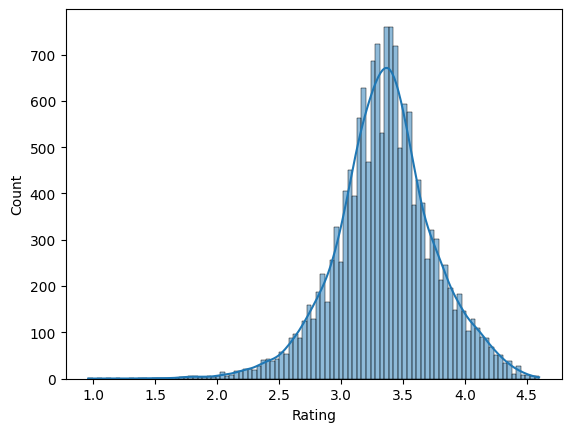

In [36]:
sns.histplot(df["Rating"].dropna(),kde=True)
#Most of the anime have their ratings between 3 and 4, suggesting that very few anime had very good ratings

<Axes: xlabel='Release_year', ylabel='Count'>

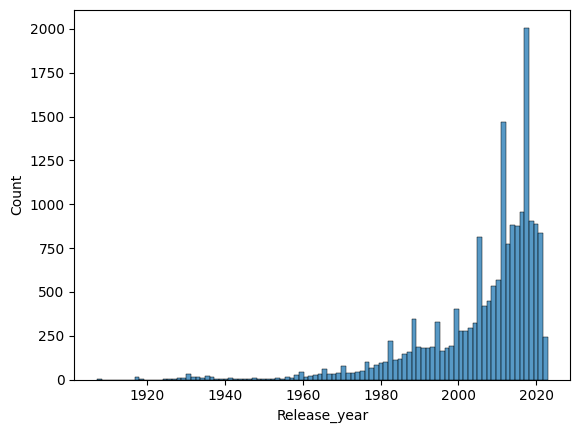

In [37]:
sns.histplot(df["Release_year"].dropna(),kde=False)
#Most of the anime have released in the past 10-15 years. This does check out as there was a boom in the manga and anime industry in the late 2010's

<Axes: xlabel='Type', ylabel='count'>

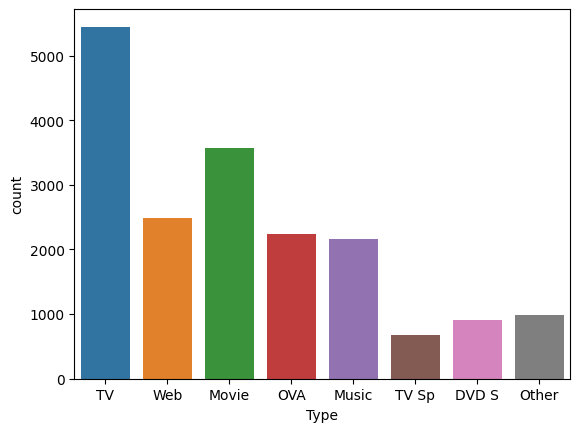

In [38]:
sns.countplot(x="Type",data=df)
#TV seems to have the highest number of anime hosted on it.

<Axes: xlabel='Studio'>

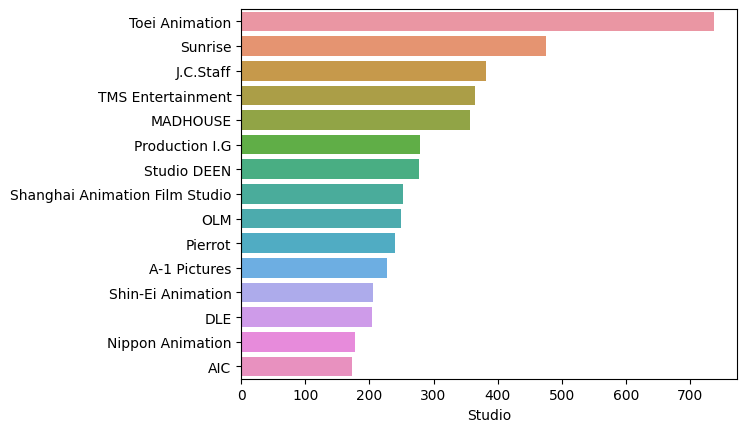

In [39]:
most_anime_studios = df["Studio"].value_counts()[:15]
sns.barplot(y=most_anime_studios.index,x=most_anime_studios)

<Axes: xlabel='Type', ylabel='Rating'>

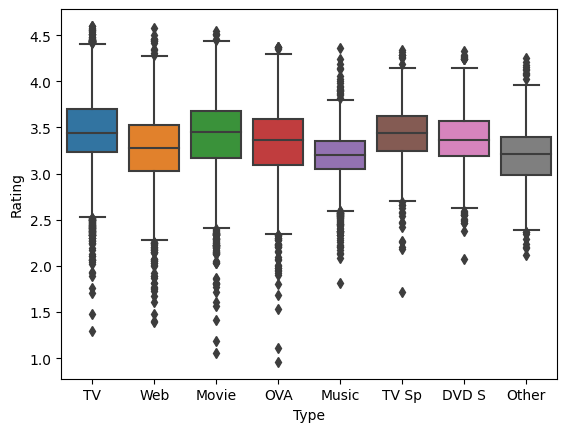

In [40]:
sns.boxplot(x="Type",y="Rating",data=df)# found the outliers
#One inference which can be deduced is that the TV Sp type, even though having less number of animes hosted on it, tends to get a higher average rating.

In [41]:
df.columns

Index(['Rank', 'Name', 'Type', 'Episodes', 'Studio', 'Release_season', 'Tags',
       'Rating', 'Release_year', 'Description', 'rel_anim_count',
       'rel_mang_count', 'voice_act_count', 'staff_count', 'tags_count',
       'rel_media_count'],
      dtype='object')

<Axes: >

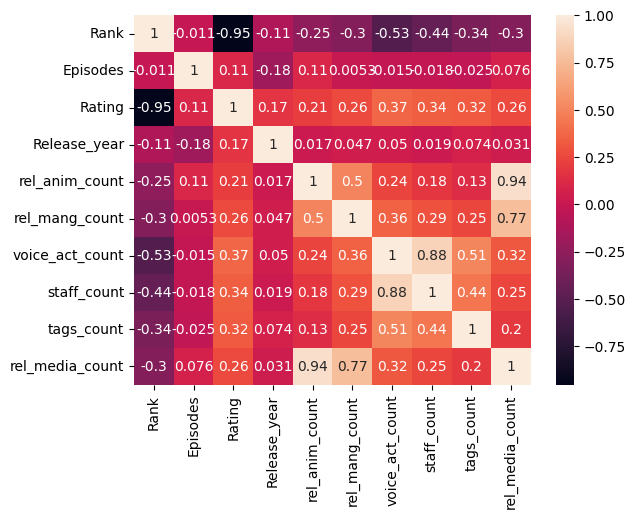

In [42]:
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True)


In [43]:
df[df['Description'] == "No synopsis yet - check back soon!"]

,Rank,Name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,Description,rel_anim_count,rel_mang_count,voice_act_count,staff_count,tags_count,rel_media_count
10500,10501,OSTER project: Ookami Nanka Kowakunai!,Music,NaN,NaN,NaN,[Vocaloid],3.2,2013.0,No synopsis yet - check back soon!,0,0,8,1,1,0
10502,10503,Kero Kero Keroppi no Gulliver no Bouken,OVA,1.0,NaN,NaN,"[Animal Protagonists, Anthropomorphic, Famil...",3.2,1993.0,No synopsis yet - check back soon!,5,0,1,0,6,5
10504,10505,Asian Kung-Fu Generation: Atarashii Sekai,Music,NaN,NaN,NaN,NaN,3.2,2008.0,No synopsis yet - check back soon!,0,0,0,0,0,0
10505,10506,Sekai Meisaku Douwa: Oyayubi Hime,Movie,NaN,Toei Animation,NaN,"[Fantasy, Family Friendly]",3.2,1978.0,No synopsis yet - check back soon!,0,0,11,3,2,0
10506,10507,Inugami-san to Nekoyama-san Special,DVD S,NaN,Seven,NaN,"[Comedy, GL, Shoujo-ai, Slice of Life, Bas...",3.2,2014.0,No synopsis yet - check back soon!,1,1,6,1,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,18480,Baise Shandian,Web,NaN,HuaMei Animation,NaN,"[Sports, Chinese Animation, Ping Pong]",NaN,NaN,No synopsis yet - check back soon!,0,0,0,0,3,0
18491,18492,Yi Tang Juchang: Sanguo Yanyi,TV,108.0,NaN,NaN,[Chinese Animation],NaN,2010.0,No synopsis yet - check back soon!,0,0,0,0,1,0
18492,18493,Fenghuang Ji Xiang Yu Qingming Shanghe Tu,TV,13.0,NaN,NaN,"[Chinese Animation, Family Friendly, Short E...",NaN,2020.0,No synopsis yet - check back soon!,0,0,0,0,3,0
18493,18494,Chengshi Jiyi Wo Men de Jieri,TV,NaN,NaN,NaN,"[Chinese Animation, Family Friendly, Short E...",NaN,2020.0,No synopsis yet - check back soon!,0,0,0,0,3,0


In [44]:
df.dropna(inplace=True,subset=["Description"])
filtering = df[df['Description'] == "No synopsis yet - check back soon!"].index
filtering2 = df[df['Description'] == "'No synopsis yet - check back soon!'"].index
df.drop(filtering,inplace=True)
df.drop(filtering2,inplace=True)
df.reset_index()

,index,Rank,Name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,Description,rel_anim_count,rel_mang_count,voice_act_count,staff_count,tags_count,rel_media_count
0,0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,TV,NaN,ufotable,Fall,"[Action, Adventure, Fantasy, Shounen, Demo...",4.60,2021.0,'Tanjiro and his friends accompany the Hashira...,3,1,12,4,12,4
1,1,2,Fruits Basket the Final Season,TV,13.0,TMS Entertainment,Spring,"[Drama, Fantasy, Romance, Shoujo, Animal T...",4.60,2021.0,'The final arc of Fruits Basket.',2,2,16,8,22,4
2,2,3,Mo Dao Zu Shi 3,Web,12.0,B.C MAY PICTURES,NaN,"[Fantasy, Ancient China, Chinese Animation, ...",4.58,2021.0,'The third season of Mo Dao Zu Shi.',2,2,16,8,6,4
3,3,4,Fullmetal Alchemist: Brotherhood,TV,64.0,Bones,Spring,"[Action, Adventure, Drama, Fantasy, Myster...",4.58,2009.0,"""The foundation of alchemy is based on the law...",3,5,16,8,18,8
4,4,5,Attack on Titan 3rd Season: Part II,TV,10.0,WIT Studio,Spring,"[Action, Fantasy, Horror, Shounen, Dark Fa...",4.57,2019.0,'The battle to retake Wall Maria begins now! W...,7,2,16,8,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10067,18486,18487,Better back then,Movie,NaN,NaN,NaN,"[Shorts, Stop Motion Animation, Original Work]",NaN,2011.0,A girl is kept on the trot by a witch and cont...,0,0,3,3,3,0
10068,18487,18488,Make My Day,Web,NaN,Studio 5,NaN,"[Horror, Monsters, Original Work]",NaN,NaN,"On a cold planet of ice and snow, mysterious c...",0,0,4,4,3,0
10069,18488,18489,Shachiku-san wa Youjo Yuurei ni Iyasaretai.,TV,NaN,Project No.9,NaN,"[Comedy, Slice of Life, Ghosts, Iyashikei, ...",NaN,2022.0,"The story follows the daily life of Fushihara,...",0,1,1,1,7,1
10070,18489,18490,Nostalgia,Movie,NaN,NaN,NaN,"[Drama, No Dialogue, Shorts, Stop Motion An...",NaN,2000.0,"In Murata’s award-winning thesis work, which m...",0,0,1,1,4,0


In [45]:
df.isna().sum()

Rank                  0
Name                  0
Type                  0
Episodes           3810
Studio             1728
Release_season     6348
Tags                110
Rating              981
Release_year        174
Description           0
rel_anim_count        0
rel_mang_count        0
voice_act_count       0
staff_count           0
tags_count            0
rel_media_count       0
dtype: int64

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70')])

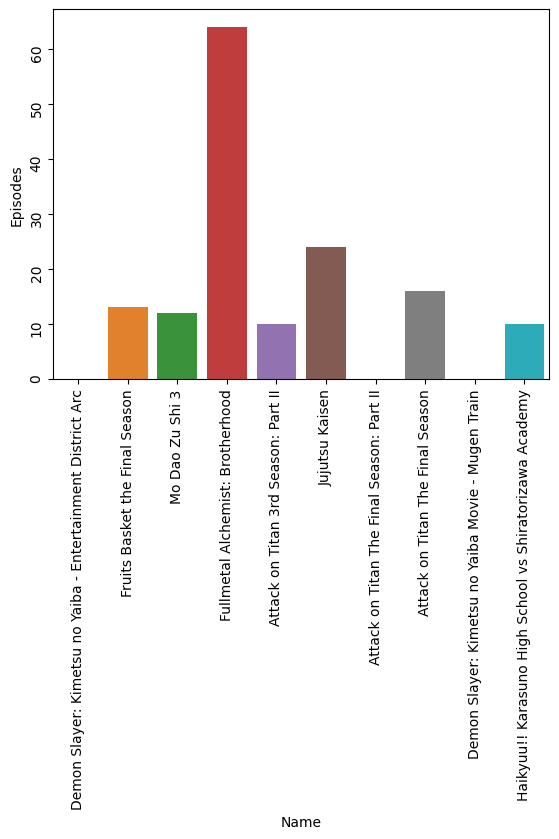

In [46]:
df_rank = df[(df.Rank < 11)]
sns.barplot(x='Name',y='Episodes',data=df_rank)
plt.xticks(rotation=90)
plt.yticks(rotation=90)

In [47]:
anime_counts=df.groupby(['Studio','Release_year']).size().reset_index(name='Anime_produced')
anime_counts

studio_total=anime_counts.groupby('Studio')['Anime_produced'].sum().reset_index(name='Total anime')

top_studio=studio_total.nlargest(10,'Total anime')
top_studio

,Studio,Total anime
565,Toei Animation,522
533,Sunrise,338
223,J.C.Staff,310
274,MADHOUSE,298
542,TMS Entertainment,235
466,Studio DEEN,228
375,Production I.G,207
320,OLM,189
361,Pierrot,180
7,A-1 Pictures,173


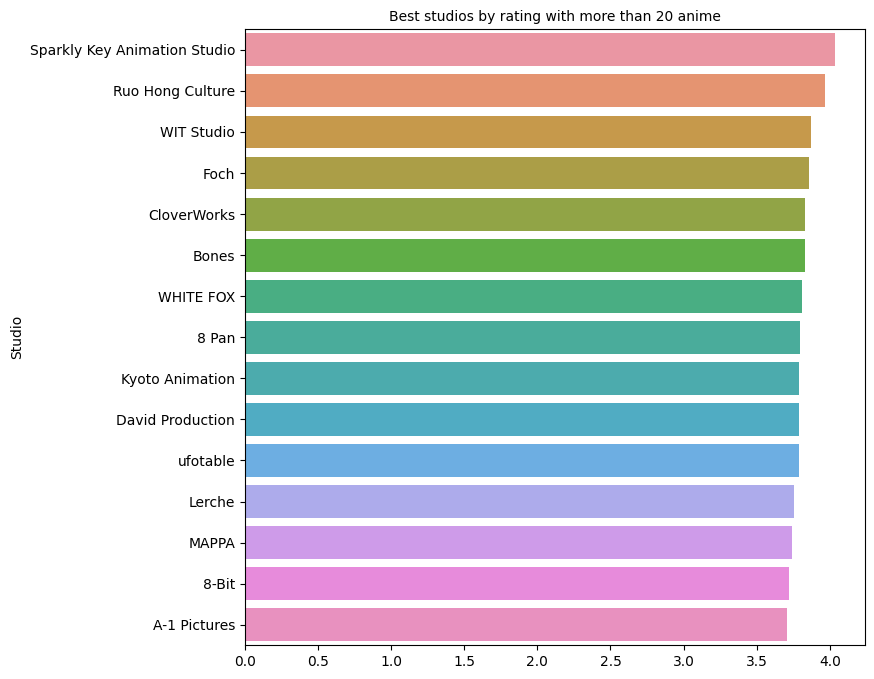

In [48]:
studios_more_20 = list(df.Studio.value_counts().index[:111])
#Here, I just used value_counts for df.Studio and found out that 111 first studio have more than 20

top_studios_rtg = df[df.Studio.isin(studios_more_20)].groupby('Studio').Rating.mean().sort_values(ascending=False)[:15]
plt.figure(figsize=(8,8))
sns.barplot(y=top_studios_rtg.index, x=top_studios_rtg.values).set_title('Best studios by rating with more than 20 anime', size=10);

In [49]:
df.columns
#corr_df.columns

Index(['Rank', 'Name', 'Type', 'Episodes', 'Studio', 'Release_season', 'Tags',
       'Rating', 'Release_year', 'Description', 'rel_anim_count',
       'rel_mang_count', 'voice_act_count', 'staff_count', 'tags_count',
       'rel_media_count'],
      dtype='object')

In [50]:
df.head()

,Rank,Name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,Description,rel_anim_count,rel_mang_count,voice_act_count,staff_count,tags_count,rel_media_count
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,TV,NaN,ufotable,Fall,"[Action, Adventure, Fantasy, Shounen, Demo...",4.60,2021.0,'Tanjiro and his friends accompany the Hashira...,3,1,12,4,12,4
1,2,Fruits Basket the Final Season,TV,13.0,TMS Entertainment,Spring,"[Drama, Fantasy, Romance, Shoujo, Animal T...",4.60,2021.0,'The final arc of Fruits Basket.',2,2,16,8,22,4
2,3,Mo Dao Zu Shi 3,Web,12.0,B.C MAY PICTURES,NaN,"[Fantasy, Ancient China, Chinese Animation, ...",4.58,2021.0,'The third season of Mo Dao Zu Shi.',2,2,16,8,6,4
3,4,Fullmetal Alchemist: Brotherhood,TV,64.0,Bones,Spring,"[Action, Adventure, Drama, Fantasy, Myster...",4.58,2009.0,"""The foundation of alchemy is based on the law...",3,5,16,8,18,8
4,5,Attack on Titan 3rd Season: Part II,TV,10.0,WIT Studio,Spring,"[Action, Fantasy, Horror, Shounen, Dark Fa...",4.57,2019.0,'The battle to retake Wall Maria begins now! W...,7,2,16,8,13,9


In [51]:
num_cols = [ 'Rating', 'Episodes', 'Release_year', 'warnings_count', 'rel_anim_count', 'rel_mang_count',
           'voice_act_count', 'staff_count', 'tags_count', 'rel_media_count']

In [52]:
df.columns

Index(['Rank', 'Name', 'Type', 'Episodes', 'Studio', 'Release_season', 'Tags',
       'Rating', 'Release_year', 'Description', 'rel_anim_count',
       'rel_mang_count', 'voice_act_count', 'staff_count', 'tags_count',
       'rel_media_count'],
      dtype='object')

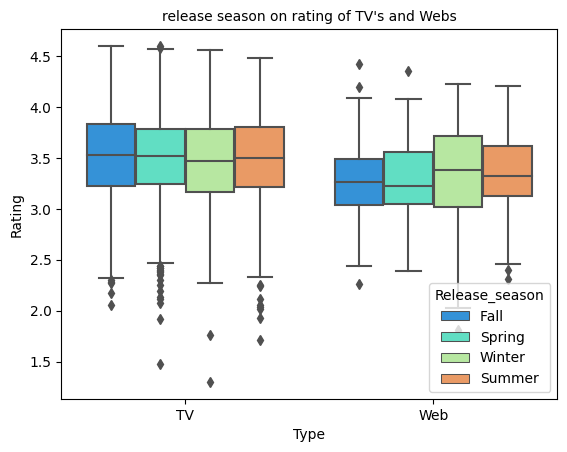

In [53]:
plt.title("release season on rating of TV's and Webs", size=10)
data_for_box = df[df.Type.isin(['TV', 'Web'])]

sns.boxplot(x='Type', y='Rating', hue='Release_season',data=data_for_box, palette='rainbow');

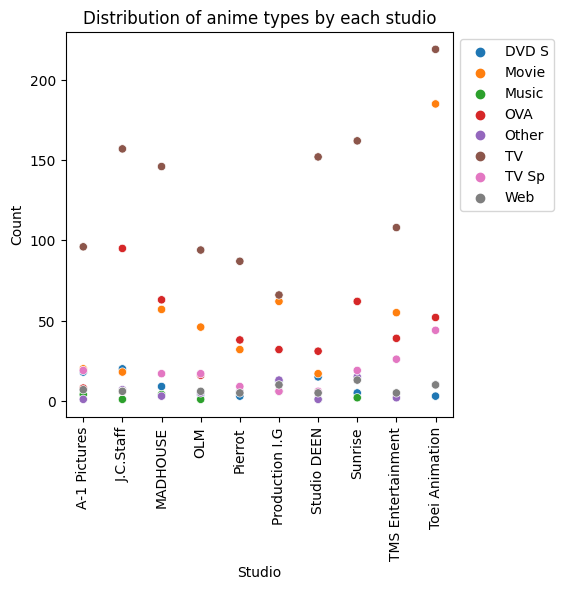

In [57]:
top_10_studio=df[df['Studio'].isin(top_studio['Studio'])]

type_counts=top_10_studio.groupby(['Studio','Type']).size().reset_index(name='Count')

fig,ax=plt.subplots(figsize=(5,5))
sns.scatterplot(x='Studio',y='Count',hue='Type',data=type_counts,ax=ax)
plt.xticks(rotation=90)
plt.title('Distribution of anime types by each studio')
plt.legend(bbox_to_anchor=(1,1))

How does the type of anime (e.g., TV series, movie, OVA) relate to the average user ratings on Anime Planet? Are there significant differences in ratings based on the type of anime?

In [68]:
df.groupby('Type')['Rating'].mean().sort_values(ascending= False)

Type
DVD S    3.541850
TV       3.476540
Movie    3.469146
TV Sp    3.447844
Web      3.353540
Music    3.302360
OVA      3.285362
Other    3.261346
Name: Rating, dtype: float64

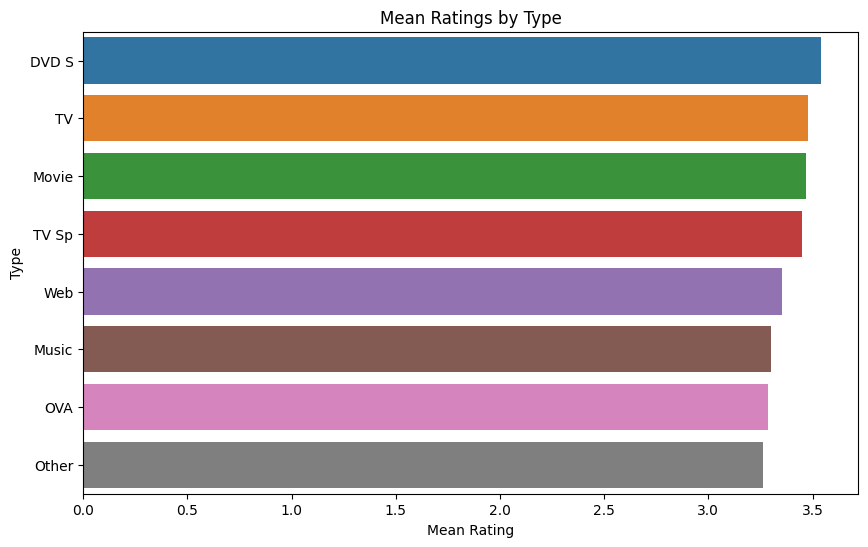

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Type', data=df, ci=None, order=df.groupby('Type')['Rating'].mean().sort_values(ascending=False).index)
plt.title('Mean Ratings by Type')
plt.xlabel('Mean Rating')
plt.ylabel('Type')
plt.show()

# based on type of animae average user ratings

In [60]:
df.groupby('Name')['Rating'].mean().sort_values(ascending= False).head(50)

# average rating of the each animae

Name
Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc    4.60
Fruits Basket the Final Season                                 4.60
Fullmetal Alchemist: Brotherhood                               4.58
Mo Dao Zu Shi 3                                                4.58
Attack on Titan 3rd Season: Part II                            4.57
Attack on Titan The Final Season: Part II                      4.56
Jujutsu Kaisen                                                 4.56
Attack on Titan The Final Season                               4.55
Demon Slayer: Kimetsu no Yaiba Movie - Mugen Train             4.54
Haikyuu!! Karasuno High School vs Shiratorizawa Academy        4.53
Haikyuu!! Second Season                                        4.51
Hunter x Hunter (2011)                                         4.51
Demon Slayer: Kimetsu no Yaiba                                 4.51
A Silent Voice                                                 4.51
your name.                                 

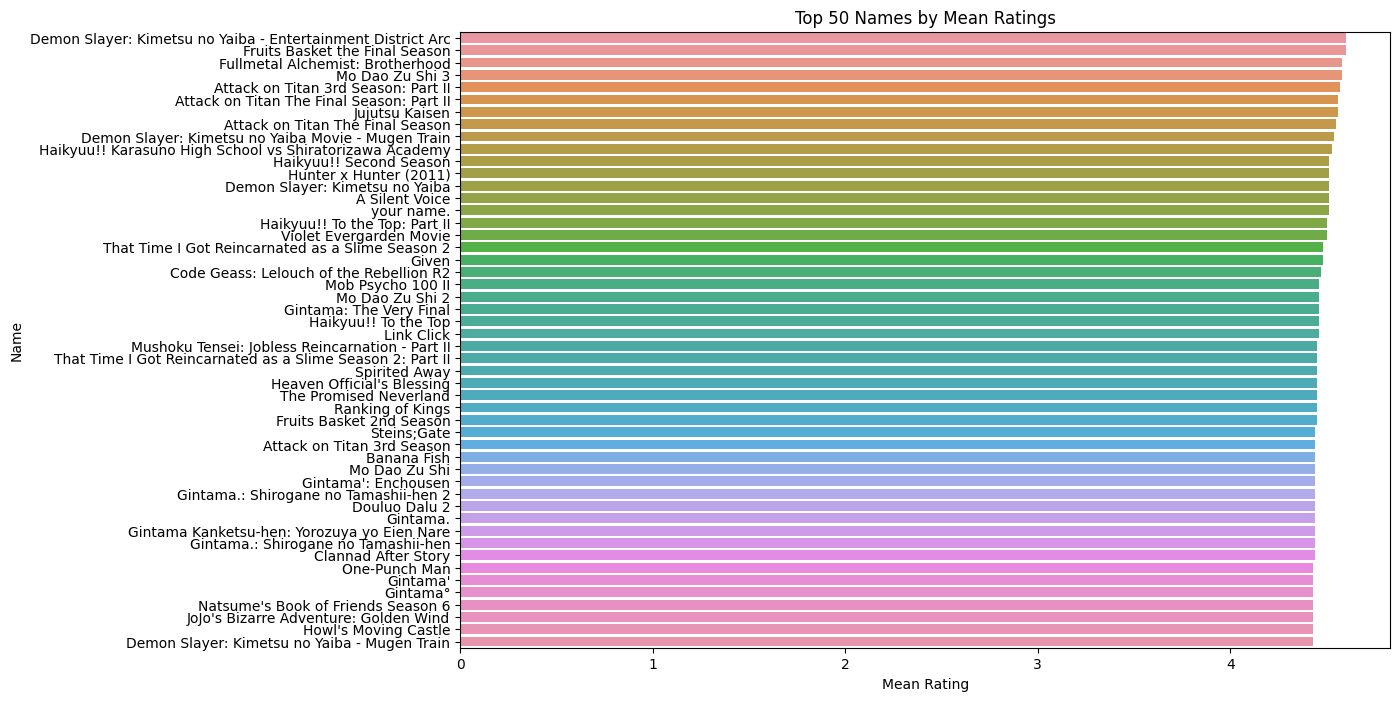

In [78]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Name', data=df, ci=None, order=df.groupby('Name')['Rating'].mean().sort_values(ascending=False).head(50).index)
plt.title('Top 50 Names by Mean Ratings')
plt.xlabel('Mean Rating')
plt.ylabel('Name')
plt.show()

DVD S: This type has the highest mean rating of 3.541850.
TV: The mean rating for TV shows is 3.476540, making it the second-highest.
Movie: Movies have a mean rating of 3.469146.
TV Sp: TV specials have a mean rating of 3.447844.
Web: Web-based content has a mean rating of 3.353540.
Music: The mean rating for music-related content is 3.302360.
OVA: Original Video Animations have a mean rating of 3.285362.
Other: The 'Other' category has the lowest mean rating among the listed types at 3.261346.
This output provides insights into the average ratings for different types of content, sorted from highest to lowest mean rating.

#2.Can we predict the user ratings of anime based on the available information such as the studio, release season, and tags? What factors have the most significant impact on an anime's rating, and can we build a predictive model for anime popularity?

In [72]:
df.columns

Index(['Rank', 'Name', 'Type', 'Episodes', 'Studio', 'Release_season', 'Tags',
       'Rating', 'Release_year', 'Description', 'rel_anim_count',
       'rel_mang_count', 'voice_act_count', 'staff_count', 'tags_count',
       'rel_media_count'],
      dtype='object')

In [73]:
df.to_csv('C:/Users/prani/OneDrive/Desktop/GWU_All Files/Data Mining/df_proj.csv') 


In [74]:
df.Tags

0        [Action,  Adventure,  Fantasy,  Shounen,  Demo...
1        [Drama,  Fantasy,  Romance,  Shoujo,  Animal T...
2        [Fantasy,  Ancient China,  Chinese Animation, ...
3        [Action,  Adventure,  Drama,  Fantasy,  Myster...
4        [Action,  Fantasy,  Horror,  Shounen,  Dark Fa...
                               ...                        
18486     [Shorts,  Stop Motion Animation,  Original Work]
18487                  [Horror,  Monsters,  Original Work]
18488    [Comedy,  Slice of Life,  Ghosts,  Iyashikei, ...
18489    [Drama,  No Dialogue,  Shorts,  Stop Motion An...
18490    [Action,  Ancient China,  Chinese Animation,  ...
Name: Tags, Length: 10072, dtype: object

In [75]:
df.Studio

0                            ufotable
1                   TMS Entertainment
2                    B.C MAY PICTURES
3                               Bones
4                          WIT Studio
                     ...             
18486                             NaN
18487                        Studio 5
18488                    Project No.9
18489                             NaN
18490    Sparkly Key Animation Studio
Name: Studio, Length: 10072, dtype: object

In [76]:
df.Release_season

0         Fall 
1        Spring
2           NaN
3        Spring
4        Spring
          ...  
18486       NaN
18487       NaN
18488       NaN
18489       NaN
18490       NaN
Name: Release_season, Length: 10072, dtype: object